# Pandas GroupBy Operations

## Understanding GroupBy Objects

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [4]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
886,0,2,male,27.0,0,0,13.00,S,NaN
887,1,1,female,19.0,0,0,30.00,S,B
888,0,3,female,NaN,1,2,23.45,S,NaN
889,1,1,male,26.0,0,0,30.00,C,C
890,0,3,male,32.0,0,0,7.75,Q,NaN


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [7]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [8]:
titanic_slice.groupby("sex")

In [9]:
gbo = titanic_slice.groupby("sex")

In [10]:
type(gbo)

pandas.core.groupby.generic.DataFrameGroupBy

In [11]:
gbo.groups # note it give the index labels not the values

{'female': [1, 2, 3, 8, 9], 'male': [0, 4, 5, 6, 7]}

In [12]:
l = list(gbo)

In [13]:
l

[('female',
        sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0),
 ('male',
      sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [14]:
len(l)

2

In [15]:
l[0]

('female',
       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [16]:
type(l[0])

tuple

In [17]:
l[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [18]:
type(l[0][1])

pandas.core.frame.DataFrame

In [19]:
l[1]

('male',
     sex   age
 0  male  22.0
 4  male  35.0
 5  male   NaN
 6  male  54.0
 7  male   2.0)

In [20]:
titanic_slice.loc[titanic_slice.sex == "female"]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [21]:
titanic_slice_f = titanic_slice.loc[titanic_slice.sex == "female"]

In [22]:
titanic_slice_m = titanic_slice.loc[titanic_slice.sex == "male"]

In [23]:
titanic_slice_f.equals(l[0][1])

True

In [24]:
for element in gbo:
    print(element[1])

      sex   age
1  female  38.0
2  female  26.0
3  female  35.0
8  female  27.0
9  female  14.0
    sex   age
0  male  22.0
4  male  35.0
5  male   NaN
6  male  54.0
7  male   2.0


## Splitting with many keys

In [25]:
summer = pd.read_csv("summer.csv")

In [26]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [27]:
summer.Country.nunique()

147

In [28]:
split1 = summer.groupby("Country")

In [29]:
l = list(split1)
l

[('AFG',
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 ('AHO',
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 ('ALG',
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  19874  1992    Barcelona  Athletics  Athletics    BOULMERKA, Hassiba     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine  

In [30]:
len(l)

147

In [31]:
l[100][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5031,1928,Amsterdam,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5741,1932,Los Angeles,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5889,1932,Los Angeles,Athletics,Athletics,"TORIBIO, Simeon Galvez",PHI,Men,High Jump,Bronze
5922,1932,Los Angeles,Boxing,Boxing,"VILLANUEVA, Jose",PHI,Men,50.8 - 54KG (Bantamweight),Bronze
6447,1936,Berlin,Athletics,Athletics,"WHITE, Miguel S.",PHI,Men,400M Hurdles,Bronze
11005,1964,Tokyo,Boxing,Boxing,"VILLANUEVA, Anthony N.",PHI,Men,54 - 57KG (Featherweight),Silver
18513,1988,Seoul,Boxing,Boxing,"SERANTES, Leopoldo",PHI,Men,- 48KG (Light-Flyweight),Bronze
20184,1992,Barcelona,Boxing,Boxing,"VELASCO, Roel",PHI,Men,- 48KG (Light-Flyweight),Bronze
21927,1996,Atlanta,Boxing,Boxing,"VELASCO, Mansueto",PHI,Men,- 48KG (Light-Flyweight),Silver


In [32]:
split2 = summer.groupby(by = ["Country", "Gender"])

In [33]:
l2 = list(split2)
l2

[(('AFG', 'Men'),
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 (('AHO', 'Men'),
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 (('ALG', 'Men'),
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine     ALG   
  21610  1996      Atlanta  Athletics  Athlet

In [34]:
len(l2)

236

In [35]:
l2[104]

(('IRL', 'Women'),
        Year     City      Sport Discipline                Athlete Country  \
 21356  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21369  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21375  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21381  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 23627  2000   Sydney  Athletics  Athletics      O'SULLIVAN, Sonia     IRL   
 29896  2012   London     Boxing     Boxing          TAYLOR, Katie     IRL   
 
       Gender                   Event   Medal  
 21356  Women          200M Butterfly  Bronze  
 21369  Women  200M Individual Medley    Gold  
 21375  Women          400M Freestyle    Gold  
 21381  Women  400M Individual Medley    Gold  
 23627  Women                   5000M  Silver  
 29896  Women                   60 KG    Gold  )

In [36]:
l2[104][0]

('IRL', 'Women')

In [37]:
l2[104][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21356,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Butterfly,Bronze
21369,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Individual Medley,Gold
21375,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Freestyle,Gold
21381,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Individual Medley,Gold
23627,2000,Sydney,Athletics,Athletics,"O'SULLIVAN, Sonia",IRL,Women,5000M,Silver
29896,2012,London,Boxing,Boxing,"TAYLOR, Katie",IRL,Women,60 KG,Gold


In [39]:
titanic = pd.read_csv("titanic.csv")

In [40]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [41]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [42]:
list(titanic_slice.groupby("sex"))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [48]:
titanic_slice.groupby("sex").mean()

,age
sex,
female,28.00
male,28.25


In [49]:
titanic.groupby("sex").survived.sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [50]:
titanic.groupby("sex")[["fare", "age"]].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [52]:
new_df = titanic.groupby("sex").mean()

In [53]:
new_df

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

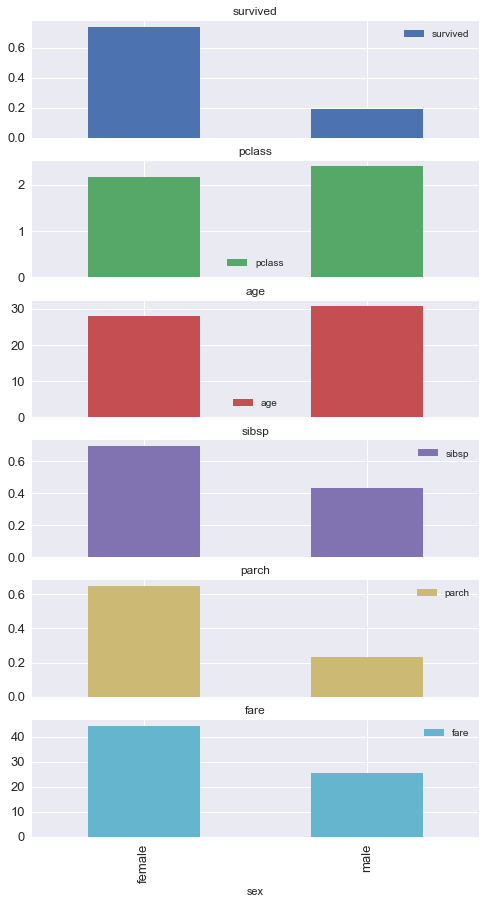

In [55]:
new_df.plot(kind = "bar", subplots = True, figsize = (8,15), fontsize = 13)
plt.show()

## split-apply-combine applied

In [57]:
summer = pd.read_csv("summer.csv")

In [58]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [59]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [64]:
medals_per_country = summer.groupby("Country").Medal.count().nlargest(n = 20)
medals_per_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

In [62]:
%matplotlib inline
plt.style.use("seaborn")

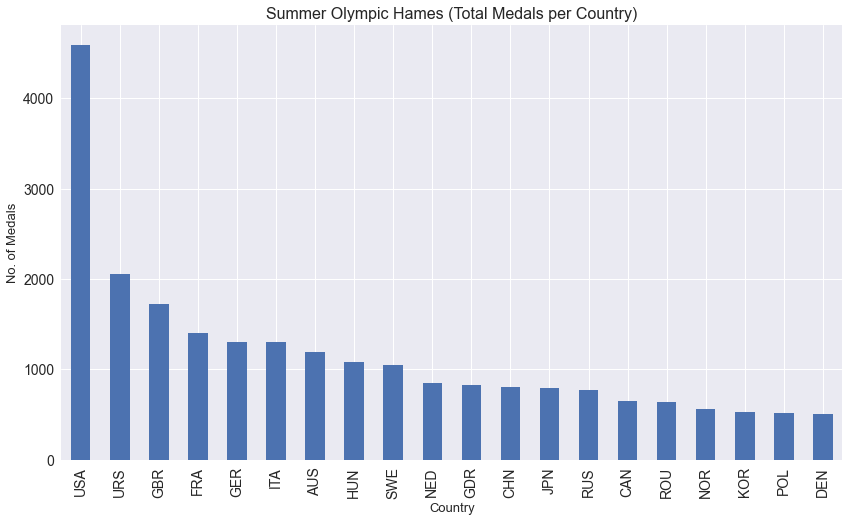

In [66]:
medals_per_country.plot(kind = "bar", figsize = (14, 8), fontsize = 14)
plt.xlabel("Country", fontsize = 13)
plt.ylabel("No. of Medals", fontsize = 13)
plt.title("Summer Olympic Hames (Total Medals per Country)", fontsize = 16)
plt.show()

In [67]:
titanic = pd.read_csv("titanic.csv")

In [69]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
titanic.fare.mean()

32.2042079685746

In [71]:
titanic.groupby("pclass").fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [72]:
titanic.survived.sum()

342

In [73]:
titanic.survived.mean()

0.3838383838383838

In [74]:
titanic.groupby("sex").survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [75]:
titanic.groupby("pclass").survived.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [76]:
titanic["ad_chi"] = "adult"

In [78]:
titanic.loc[titanic.age < 18, "ad_chi"] = "child"

In [79]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult
5,0,3,male,NaN,0,0,8.4583,Q,NaN,adult
6,0,1,male,54.0,0,0,51.8625,S,E,adult
7,0,3,male,2.0,3,1,21.0750,S,NaN,child
8,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,1,2,female,14.0,1,0,30.0708,C,NaN,child


In [80]:
titanic.ad_chi.value_counts()

adult    778
child    113
Name: ad_chi, dtype: int64

In [81]:
titanic.groupby(["sex", "ad_chi"]).survived.count()

sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: survived, dtype: int64

In [82]:
titanic.groupby(["sex", "ad_chi"]).survived.mean().sort_values(ascending = False)

sex     ad_chi
female  adult     0.752896
        child     0.690909
male    child     0.396552
        adult     0.165703
Name: survived, dtype: float64

In [83]:
w_and_c_first = titanic.groupby(["sex", "ad_chi"]).survived.mean().sort_values(ascending = False)

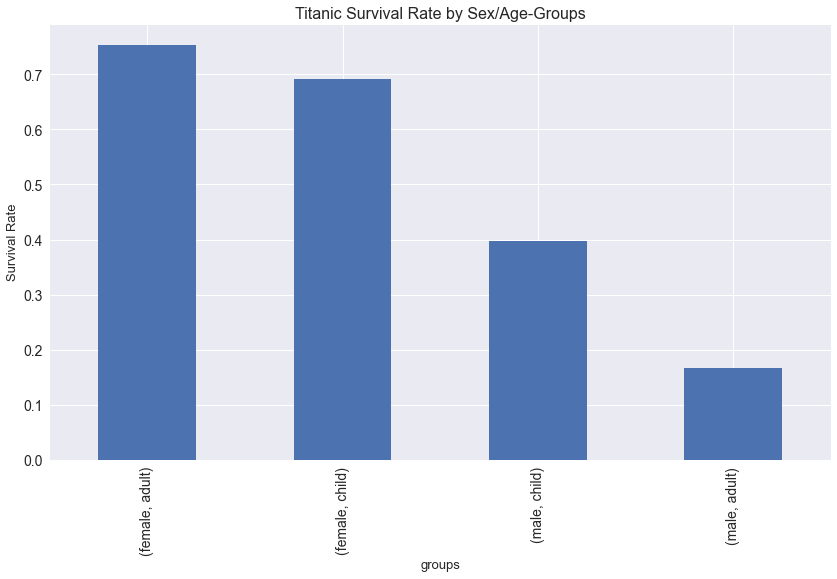

In [84]:
w_and_c_first.plot(kind= "bar", figsize = (14,8), fontsize = 14)
#plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 13)
plt.xlabel("groups", fontsize = 13)
plt.ylabel("Survival Rate", fontsize = 13)
plt.title("Titanic Survival Rate by Sex/Age-Groups", fontsize = 16)
plt.show()

In [85]:
titanic.groupby("sex")[["survived", "pclass", "age", "fare"]].agg(["sum", "mean"])

survived           pclass                 age                   fare  \
            sum      mean    sum      mean       sum       mean         sum   
sex                                                                           
female      233  0.742038    678  2.159236   7286.00  27.915709  13966.6628   
male        109  0.188908   1379  2.389948  13919.17  30.726645  14727.2865   

                   
             mean  
sex                
female  44.479818  
male    25.523893

## Advanced Aggregation with agg()

In [87]:
titanic = pd.read_csv("titanic.csv", usecols = ["survived", "pclass", "sex", "age", "fare"])

In [88]:
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [89]:
titanic.groupby("sex").mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [90]:
titanic.groupby("sex").sum()

,survived,pclass,age,fare
sex,,,,
female,233,678,7286.00,13966.6628
male,109,1379,13919.17,14727.2865


In [91]:
titanic.groupby("sex").agg(["mean", "sum", "min", "max"])

survived                 pclass                      age            \
            mean  sum min max      mean   sum min max       mean       sum   
sex                                                                          
female  0.742038  233   0   1  2.159236   678   1   3  27.915709   7286.00   
male    0.188908  109   0   1  2.389948  1379   1   3  30.726645  13919.17   

                         fare                              
         min   max       mean         sum   min       max  
sex                                                        
female  0.75  63.0  44.479818  13966.6628  6.75  512.3292  
male    0.42  80.0  25.523893  14727.2865  0.00  512.3292

In [92]:
titanic.groupby("sex").agg({"survived": ["sum", "mean"], "pclass": "mean", "age": ["mean", "median"], "fare": "max"})

survived              pclass        age             fare
            sum      mean      mean       mean median       max
sex                                                            
female      233  0.742038  2.159236  27.915709   27.0  512.3292
male        109  0.188908  2.389948  30.726645   29.0  512.3292

In [93]:
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [94]:
titanic.groupby("sex").survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [95]:
titanic.groupby("sex").agg(survival_rate = ("survived", "mean"))

,survival_rate
sex,
female,0.742038
male,0.188908


In [96]:
titanic.groupby("sex").agg({"survived": ["sum", "mean"], "age": ["mean"]})

survived                  age
            sum      mean       mean
sex                                 
female      233  0.742038  27.915709
male        109  0.188908  30.726645

In [ ]:
titanic.groupby("sex").agg(survived_total = ("survived", "sum"), survival_rate = ("survived", "mean"), mean_age = ("age", "mean")